# EDA

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')

/var/folders/2x/tx689lxn54ngmttr2b89rvg00000gn/T/ipykernel_47790/3417997114.py:1: DtypeWarning: Columns (264) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')


In [12]:
non_vascular_deaths = ['MNRI1054', 'MNRI1191', 'MNRI1351', 'MNRI1352', 'MNRI1473', 'MNRI1670', 'MNRI0637', 'MNRI0656', 'MNRI0751', 'MNRI0758',
                      'MNRI0805', 'MNRI0818', 'MNRI1054', 'MNRI0087', 'MNRI1191', 'MNRI0108', 'MNRI0307', 'MNRI0215', 'MNRI0322', 'MNRI0293',
                      'MNRI0156', 'MNRI0215', 'MNRI0488', 'MNRI0612', 'MNRI0708', 'MNRI0767', 'MNRI0772', 'MNRI0786', 'MNRI1105', 'MNRI1186',
                      'MNRI1462', 'MNRI1633']

df = df[~df['record_id'].isin(non_vascular_deaths)]

In [13]:
train_columns = ['age', 'anemia', 'ef', 'cerebrovascular_disease',
                 'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
                 'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
                 'height', 'def', 'history_of_cancer', 'stent_type___5',
                 'previous_stroke_tia', 'stent_diameter', 'stent_length', 'adhoc_pci',
                 'previous_pci', 'stent_type___4', 'cto_bifurc']

In [14]:
without_second_bif = df
adverse_events = without_second_bif['event_type_followup_f2___1'] \
| without_second_bif['event_type_followup_f2___2'] \
| without_second_bif['event_type_followup_f2_v2___1'] \
| without_second_bif['event_type_followup_f2_v2___2']
print(sum(adverse_events))
print(len(adverse_events))

combined = zip(without_second_bif['event_type_followup_f2___1'],  
               without_second_bif['event_type_followup_f2___2'] * 2,
               without_second_bif['event_type_followup_f2_v2___1'] * 3, 
               without_second_bif['event_type_followup_f2_v2___2'] * 4)

combined_adverse_events = np.array([max(t) for t in combined])
df['target'] = combined_adverse_events

160
2115


In [15]:
print("Dataset shape:", df.shape)
print("\nInfo on train_columns:")
df[train_columns].info()

Dataset shape: (2115, 284)

Info on train_columns:
<class 'pandas.core.frame.DataFrame'>
Index: 2115 entries, 0 to 2143
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2044 non-null   float64
 1   anemia                     1601 non-null   float64
 2   ef                         2009 non-null   float64
 3   cerebrovascular_disease    2044 non-null   float64
 4   peripheral_artery_disease  2043 non-null   float64
 5   if_yes_what_type___1       2115 non-null   int64  
 6   single_vessel              2113 non-null   float64
 7   calcium                    2115 non-null   int64  
 8   stent_type___3             2115 non-null   int64  
 9   medina_side                2115 non-null   int64  
 10  atrial_fibrilation         2044 non-null   float64
 11  height                     1964 non-null   float64
 12  def                        2074 non-null   float64
 13  hi

In [16]:
print("\nBasic statistics for numerical features:")
numeric_cols = df[train_columns].select_dtypes(include=['int64', 'float64']).columns
display(df[numeric_cols].describe())


Basic statistics for numerical features:


,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,stent_type___5,previous_stroke_tia,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc
count,2044.000000,1601.000000,2009.000000,2044.000000,2043.000000,2115.000000,2113.000000,2115.000000,2115.000000,2115.000000,...,2074.000000,1658.000000,2115.000000,197.000000,2078.000000,2078.000000,2044.000000,2044.000000,2115.000000,2115.000000
mean,63.854697,0.061836,56.128372,0.125245,0.081253,0.021749,0.454330,0.205674,0.368322,0.334752,...,0.005786,0.060314,0.009456,0.482234,3.246152,24.324350,0.402153,0.414873,0.114894,0.083688
std,9.746263,0.240933,10.678587,0.331077,0.273290,0.145899,0.498028,0.404289,0.482463,0.472015,...,0.075863,0.238139,0.096805,0.500957,0.512643,8.464471,0.490452,0.492821,0.318969,0.276985
min,28.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.250000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,0.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.750000,18.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,23.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,0.000000,63.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,3.500000,32.000000,1.000000,1.000000,0.000000,0.000000
max,97.000000,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,4.500000,65.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
missing_values = df[train_columns].isnull().sum()
print("\nMissing values in train columns:")
print(missing_values[missing_values > 0])


Missing values in train columns:
age                            71
anemia                        514
ef                            106
cerebrovascular_disease        71
peripheral_artery_disease      72
single_vessel                   2
atrial_fibrilation             71
height                        151
def                            41
history_of_cancer             457
previous_stroke_tia          1918
stent_diameter                 37
stent_length                   37
adhoc_pci                      71
previous_pci                   71
dtype: int64


In [18]:
print("\nTarget variable distribution:")
target_counts = df['target'].value_counts(dropna=False).sort_index()
display(target_counts)


Target variable distribution:


target
0    1955
1      53
2      19
3      52
4      36
Name: count, dtype: int64

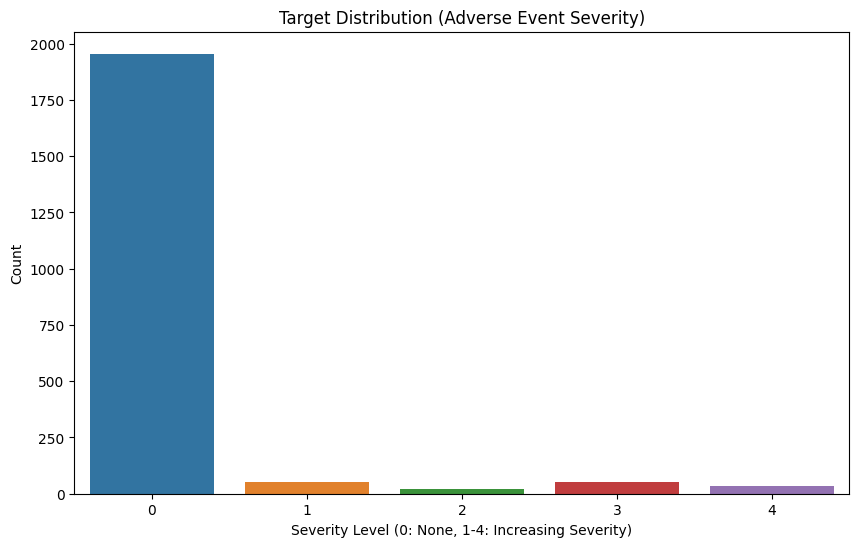

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Target Distribution (Adverse Event Severity)')
plt.xlabel('Severity Level (0: None, 1-4: Increasing Severity)')
plt.ylabel('Count')
plt.show()

In [20]:
print(f"\nClass imbalance:")
print(f"No adverse events (0): {(df['target'] == 0).mean():.2%}")
print(f"Any adverse events (1-4): {(df['target'] > 0).mean():.2%}")



Class imbalance:
No adverse events (0): 92.43%
Any adverse events (1-4): 7.57%


In [37]:
print("\nMissing value percentages:")
missing_pct = df[train_columns].isna().mean() * 100
print(missing_pct[missing_pct > 0].sort_values(ascending=False))


Missing value percentages:
previous_stroke_tia          90.685579
anemia                       24.302600
history_of_cancer            21.607565
height                        7.139480
ef                            5.011820
peripheral_artery_disease     3.404255
age                           3.356974
cerebrovascular_disease       3.356974
atrial_fibrilation            3.356974
adhoc_pci                     3.356974
previous_pci                  3.356974
def                           1.938534
stent_diameter                1.749409
stent_length                  1.749409
single_vessel                 0.094563
dtype: float64


In [56]:
# Add this at the beginning of your notebook or script
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message='use_inf_as_na option is deprecated')

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

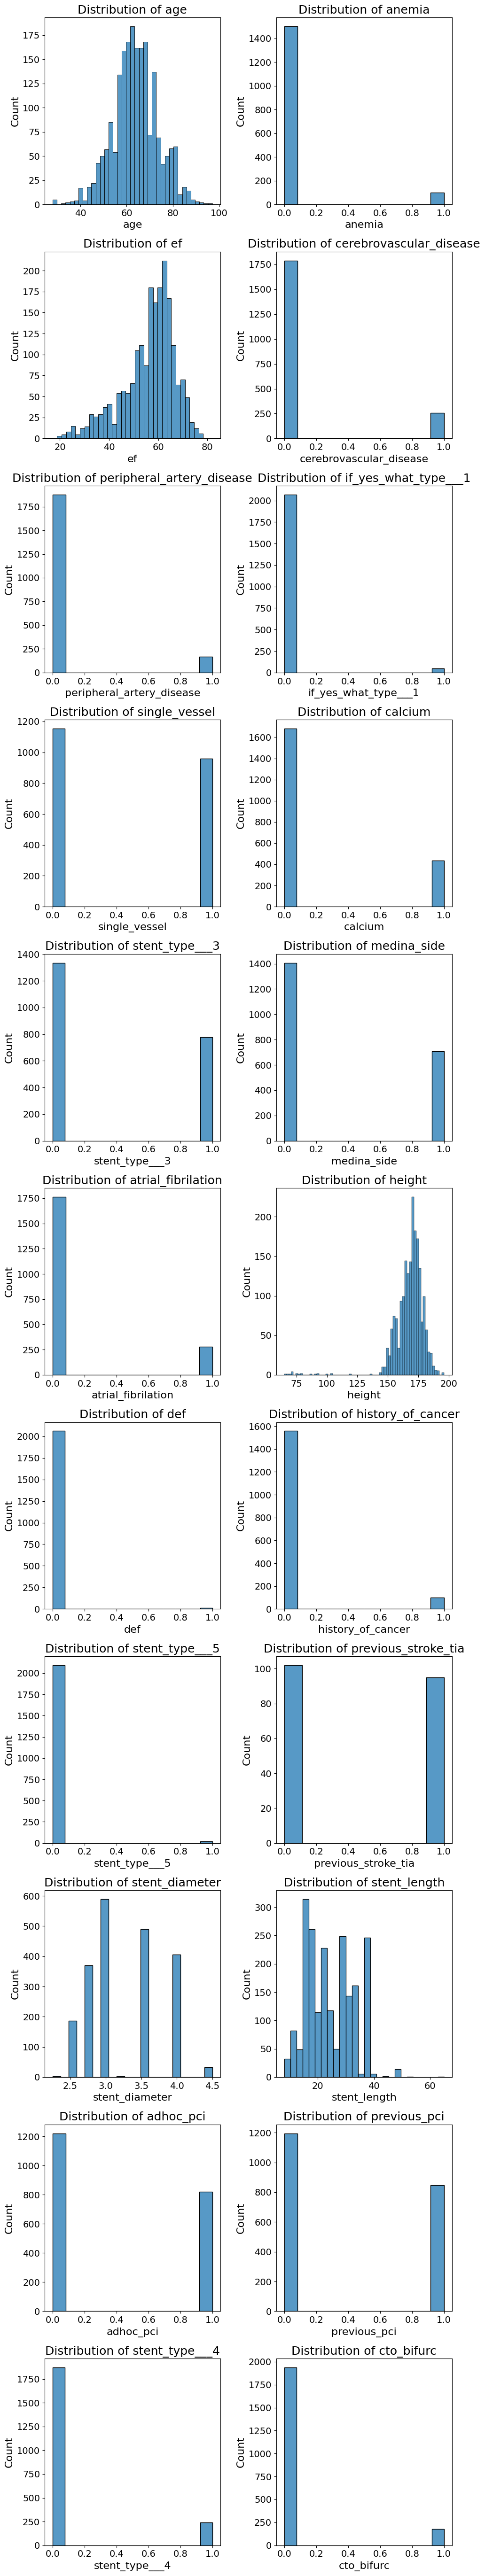

In [70]:
copy = df.copy()
copy['target'] = (copy['target'] > 0).astype(int)

# Calculate the number of rows needed for the grid
num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / 2)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Plot each column in its own subplot
for i, column in enumerate(numeric_cols):
    if i < len(axes):  # Make sure we don't exceed the number of axes
        ax = axes[i]
        sns.histplot(data=copy, x=column, multiple='stack', kde=False, ax=ax)
        
        # Increase font size for this specific plot
        ax.set_title(f'Distribution of {column}', fontsize=18)
        ax.set_xlabel(column, fontsize=16)
        ax.set_ylabel('Count', fontsize=16)
        
        # Increase tick label size
        ax.tick_params(axis='both', which='major', labelsize=14)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

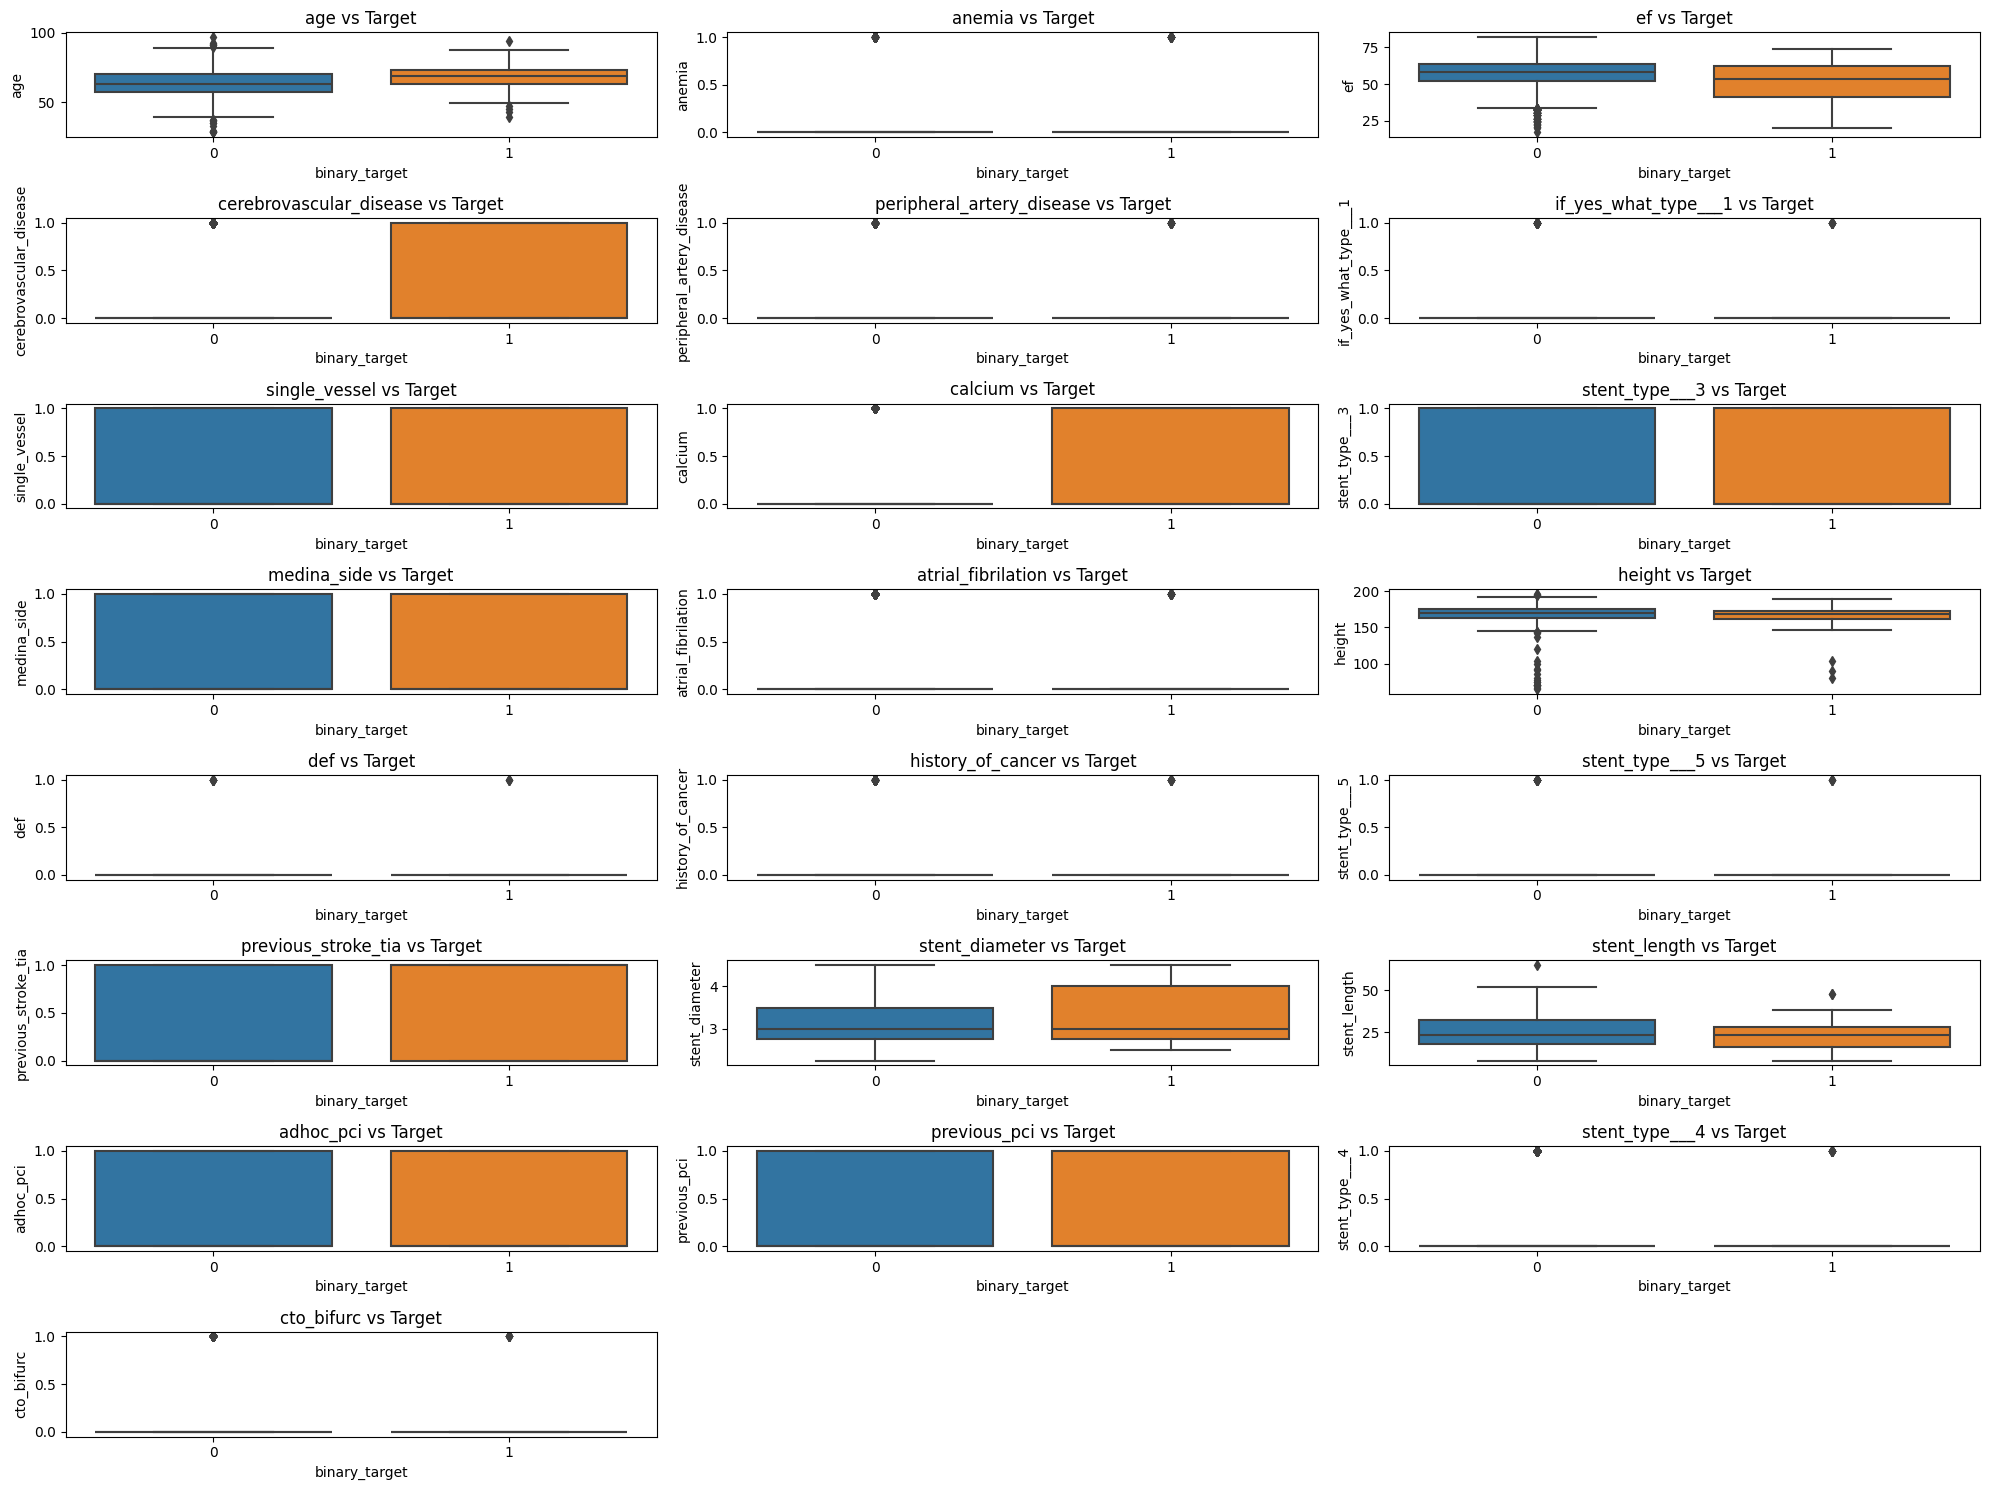

In [22]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i+1)
    sns.boxplot(x='binary_target', y=column, data=df)
    plt.title(f'{column} vs Target')
plt.tight_layout()
plt.show()

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


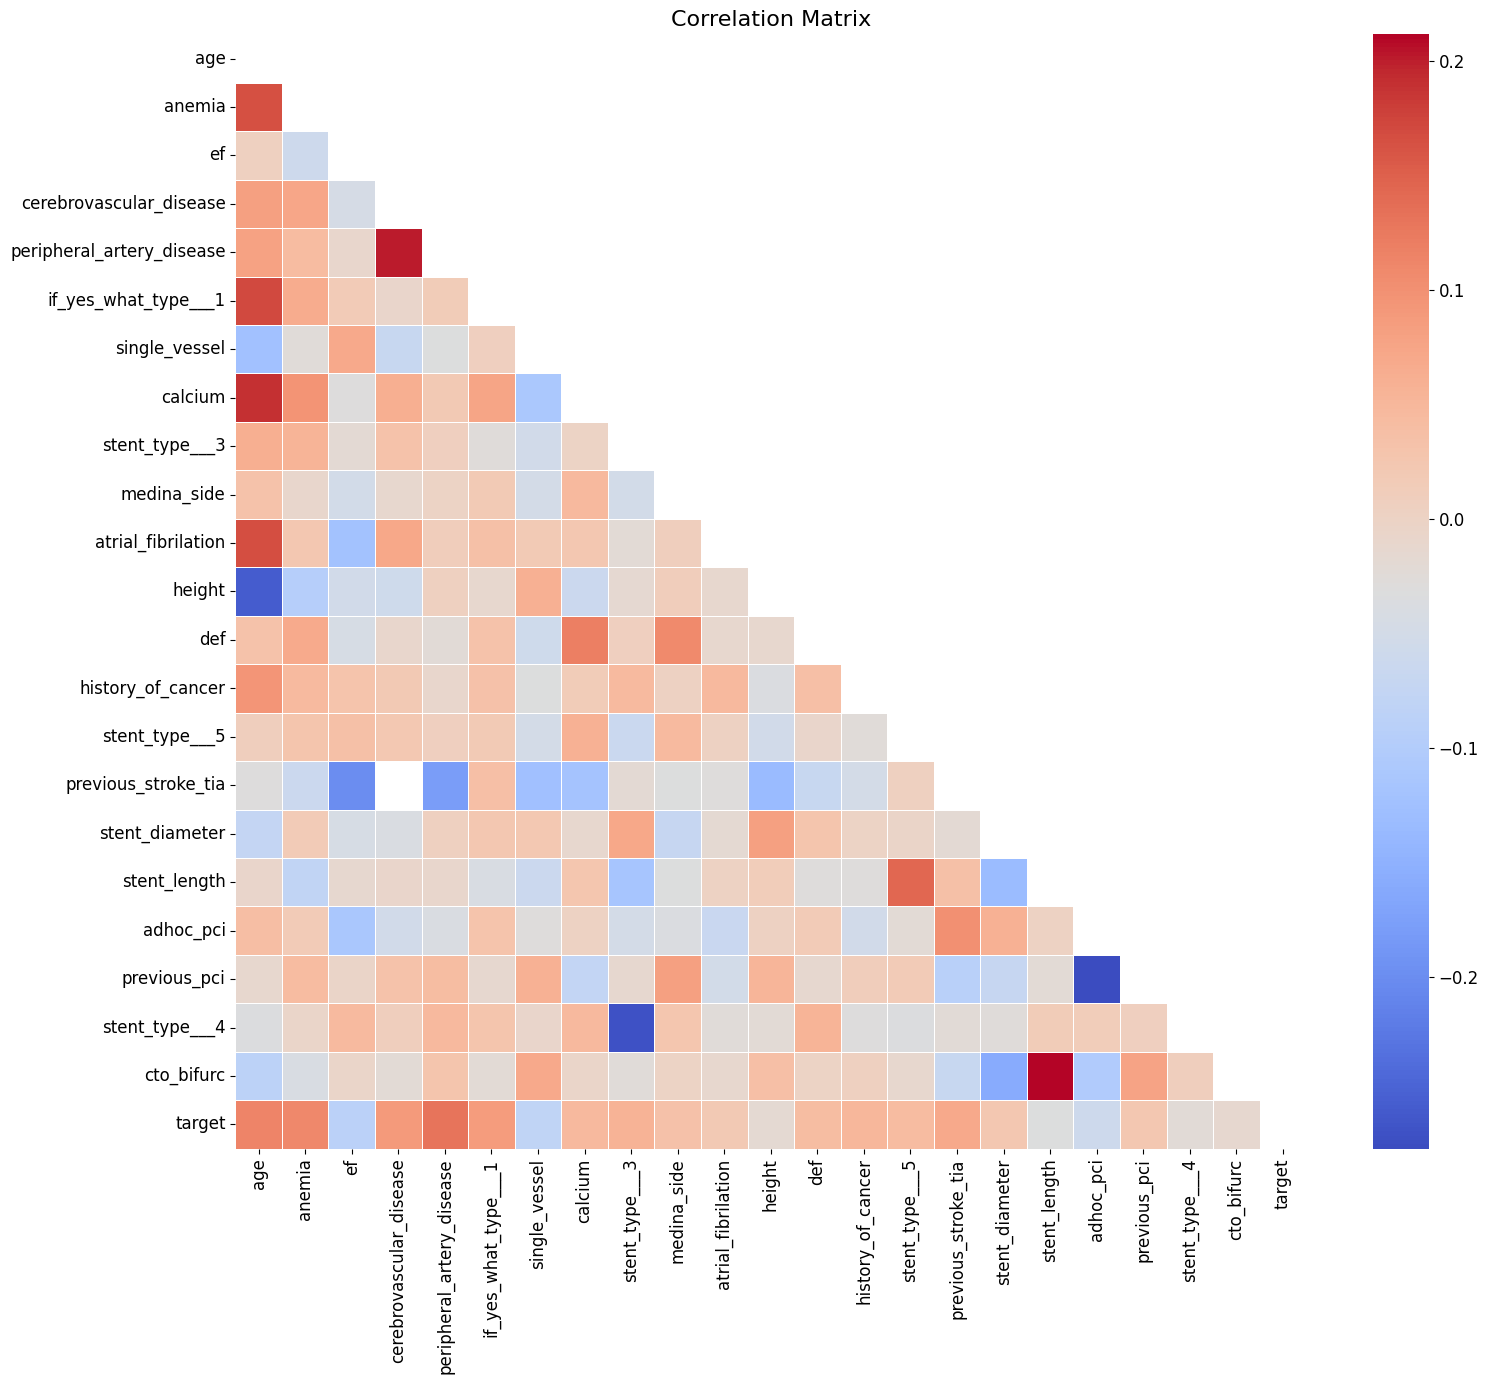

In [75]:
features_with_target = train_columns.copy()
correlation_data = df[features_with_target + ['target']]

plt.figure(figsize=(16, 14))
correlation_matrix = correlation_data.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


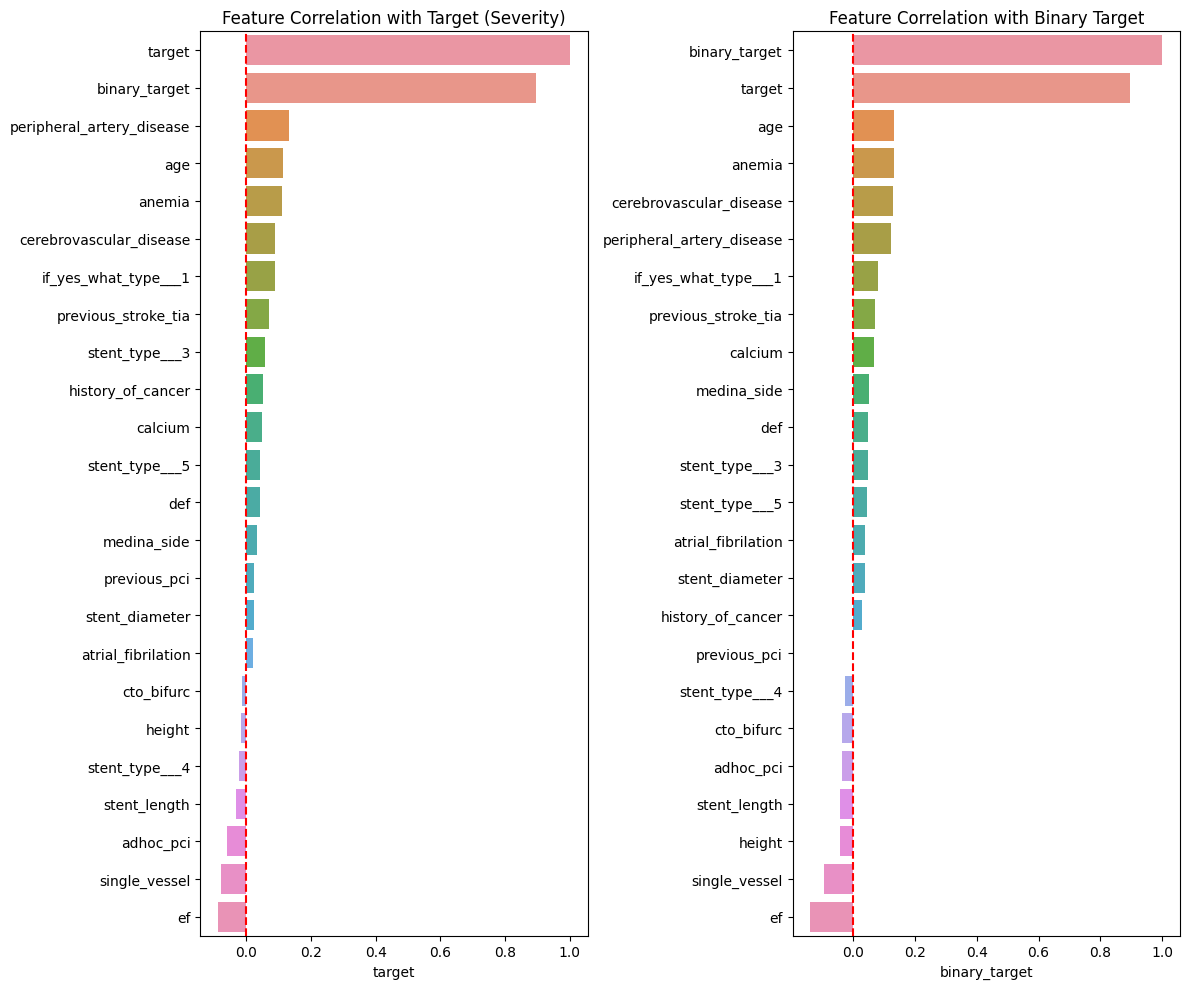

In [24]:
target_correlation = correlation_matrix[['target']].sort_values(by='target', ascending=False)
binary_target_correlation = correlation_matrix[['binary_target']].sort_values(by='binary_target', ascending=False)

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
sns.barplot(y=target_correlation.index, x='target', data=target_correlation)
plt.title('Feature Correlation with Target (Severity)')
plt.axvline(x=0, color='red', linestyle='--')

plt.subplot(1, 2, 2)
sns.barplot(y=binary_target_correlation.index, x='binary_target', data=binary_target_correlation)
plt.title('Feature Correlation with Binary Target')
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.show()


In [27]:
numerical = ['age', 'weight', 'height', 'ef', 'creatinine', 'ckd', 'angle', 'mb_length_proximal', 
            'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
            'stenosis_distal', 'side_stenosis', 'minor_criteria', 'main_branch_rvd', 
            'stent_diameter', 'stent_length', 'stent_distal_vessel_size', 'sb_stent_sb_diametr',
            'ballooon_size_for_postdila', 
            'left_main_stent_direction',
            'mb_stenosis_f2',
            'myocardial_ischemia',
            'number_of_kissing_2',
            'pot_balloon_diametr_2',
            'pot_balloon_length',
            'pot_balloon_length_2',
            'pressure2',
            'sb_length_2',
            'sb_stenosis_f2',
            'stent_pressure']

categorical = ['sex', 'clinical_presentation', 'bifurcation_location', 'stent_number', 
              'stent_number_bif', 'stent_technique', 'stent_direction']

binary = ['diabet', 'adhoc_pci', 'hypertension', 'smoking', 'dyslipidemia', 'anemia', 
         'atrial_fibrilation', 'oac_use', 'if_yes_what_type___1', 'if_yes_what_type___2',
         'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___6', 
         'mi_history', 'cerebrovascular_disease', 'peripheral_artery_disease', 'copd', 
         'history_of_cancer', 'previous_pci', 'previous_cabg', 'single_vessel', 'trifurcation',
         'calcium', 'trombosis', 'restenosis_reocclusion', 'cto_bifurc', 
         'medina_proximal', 'medina_distal', 'medina_side', 'major_lm', 'major_non_lm',
         'def', 'def_2', 'side_protection', 'main_predilatation', 'side_predilat',
         'defered_stenting', 'stent_type___1', 'stent_type___2', 'stent_type___3', 'stent_type___4',
         'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 'stent_type___8', 
         'sb_dilatation', 'stent_postdilatation', 'kissing_post', 'modified_kis',
         'currently_on_dialysis',
         'ishemia_test___1',
         'ishemia_test___2',
         'ishemia_test___3',
         'kissing_post_2stent___1',
         'kissing_post_2stent___2',
         'reson_for_change_stopped___1',
         'reson_for_change_stopped___2',
         'reson_for_change_stopped___3',
         'stent_type_2___1',
         'stent_type_2___3',
         'stent_type_2___4',
         'stent_type_2___5',
         'stent_type_2___6',
         'stent_type_2___7',
         'stent_type_2___8',
         'uncross_strategy___1',
         'uncross_strategy___2',
         'uncross_strategy___3',
         'uncross_strategy___4',
         'uncross_strategy___8',
         'uncross_strategy___9']

In [ ]:
for i, column in enumerate(categorical):
    if(column in train_columns):
      print(column)

/var/folders/2x/tx689lxn54ngmttr2b89rvg00000gn/T/ipykernel_47790/509907426.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


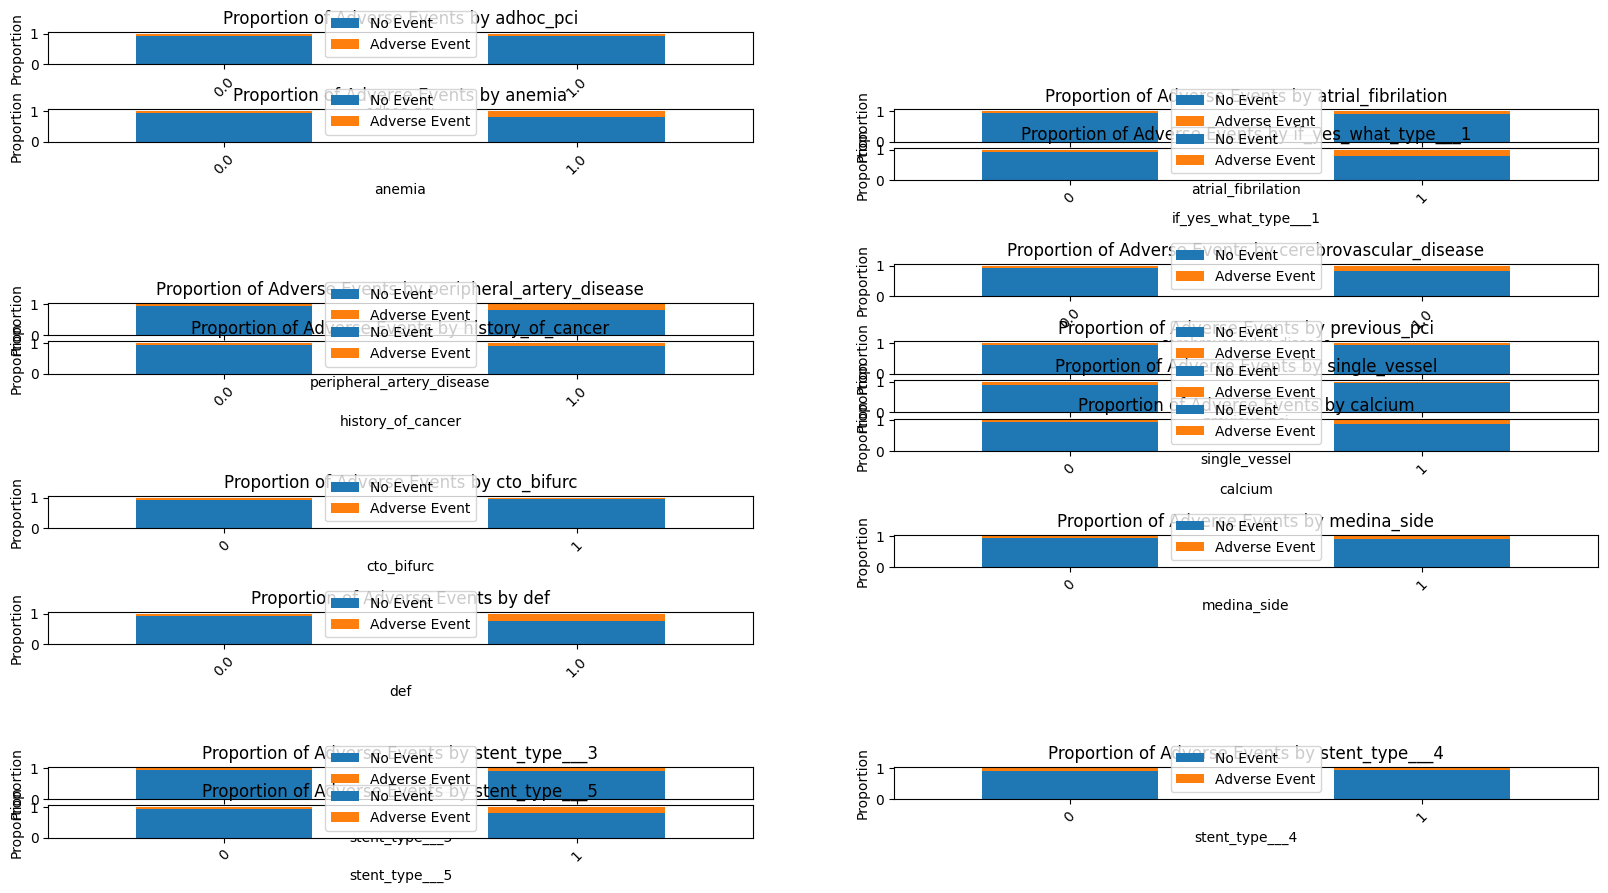

In [34]:
categorical_and_binary = categorical + binary
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_and_binary):
    if(column in train_columns):
        plt.subplot(len(categorical_and_binary)//2 + 1, 2, i+1)
        cross_tab = pd.crosstab(df[column], df['binary_target'], normalize='index')
        cross_tab.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title(f'Proportion of Adverse Events by {column}')
        plt.ylabel('Proportion')
        plt.legend(['No Event', 'Adverse Event'])
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()